In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Datasets/training.csv")
test = pd.read_csv('Datasets/test.csv')
validation = pd.read_csv('Datasets/validation.csv')

Labels :

  * 0 = sadness
  * 1 = joy
  * 2 = love
  * 3 = anger
  * 4 = fear
  * 5 = surprise

In [3]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
def replace_label(df):
    df['label'] = df['label'].replace({0: 0, 1: 1, 2: 1, 3: 3, 4: 4, 5: 3}) 

0 = sadness
1 = joy or love
3 = confus
4 = peur

In [8]:
replace_label(train)
replace_label(test)
replace_label(validation)

## Visualisation

<Axes: xlabel='label', ylabel='count'>

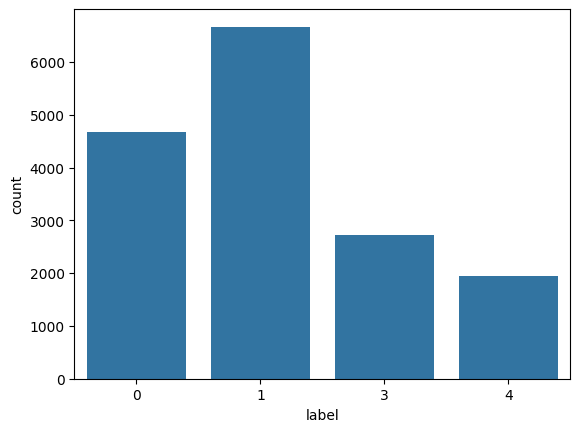

In [9]:
sns.countplot(x='label',data=train)

<Axes: xlabel='label', ylabel='count'>

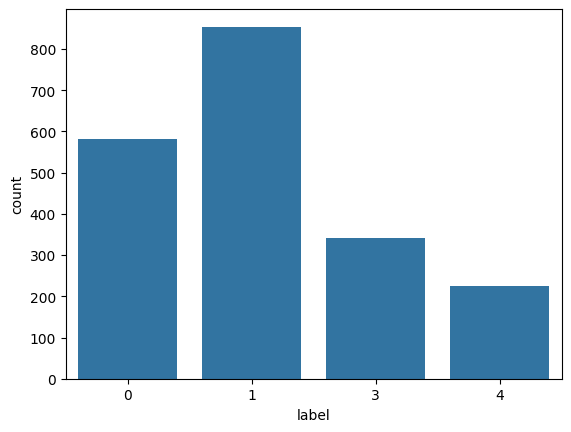

In [10]:
sns.countplot(x='label',data=test)

<Axes: xlabel='label', ylabel='count'>

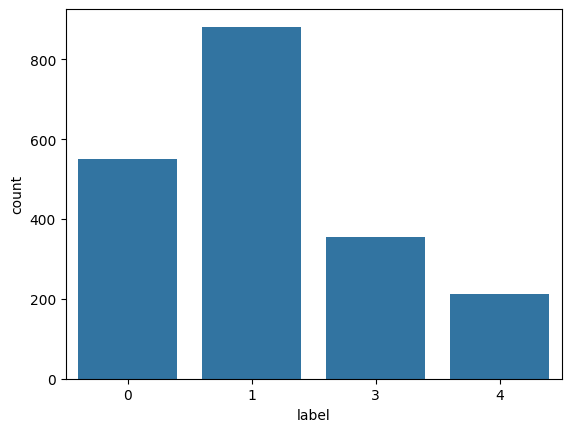

In [11]:
sns.countplot(x='label',data=validation)

On peut conclure que la répartitions des données par catégories est semblable pour tous les datasets sachant qu'il y a une prédominance des données de catégories 0 et 1.

## Data Preprocessing

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in ['feel', 'feeling']]
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [str(lemmatizer.lemmatize(token)) for token in filtered_tokens]
    return lemmatized_tokens

In [16]:
train['text'] = train['text'].apply(preprocess_text)

In [17]:
test['text'] = test['text'].apply(preprocess_text)
validation['text'] = validation['text'].apply(preprocess_text)

In [18]:

print(train.text.iloc[0])

['didnt', 'humiliated']


In [19]:
train.head()

,text,label
0,"[didnt, humiliated]",0
1,"[go, hopeless, damned, hopeful, around, someon...",0
2,"[im, grabbing, minute, post, greedy, wrong]",3
3,"[ever, nostalgic, fireplace, know, still, prop...",1
4,[grouchy],3


In [20]:
test.head()

,text,label
0,"[im, rather, rotten, im, ambitious, right]",0
1,"[im, updating, blog, shitty]",0
2,"[never, make, separate, ever, want, like, asha...",0
3,"[left, bouquet, red, yellow, tulip, arm, sligh...",1
4,"[little, vain, one]",0


In [21]:
validation.head()

,text,label
0,"[im, quite, sad, sorry, ill, snap, soon]",0
1,"[like, still, looking, blank, canvas, blank, p...",0
2,"[like, faithful, servant]",1
3,"[cranky, blue]",3
4,"[treat, festive]",1


In [22]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=train['text'], min_count=25, vector_size=600, window=8, workers=10, epochs=100)
model.train(train['text'], total_examples=len(train['text']), epochs=100)
print(model.wv.most_similar('god'))

[('letting', 0.1859685480594635), ('long', 0.17478276789188385), ('side', 0.17138169705867767), ('mother', 0.16171878576278687), ('ungrateful', 0.16010989248752594), ('mine', 0.15443263947963715), ('guilty', 0.15134277939796448), ('sincere', 0.14807595312595367), ('abused', 0.1477954089641571), ('father', 0.143548384308815)]


In [23]:
def vectorize_text(text, model):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
    
train_vectors = train['text'].apply(lambda x: vectorize_text(x, model))
test_vectors = test['text'].apply(lambda x: vectorize_text(x, model))
validation_vectors = validation['text'].apply(lambda x: vectorize_text(x, model))

X_train = np.vstack(train_vectors)
X_test = np.vstack(test_vectors)
X_validation = np.vstack(validation_vectors)

y_train = train['label']
y_test = test['label']
y_validation = validation['label']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_logistic = LogisticRegression(random_state=42)
rf_logistic.fit(X_train, y_train)


y_pred_lg = rf_logistic.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lg)}')
print(classification_report(y_test, y_pred_lg))
print(confusion_matrix(y_test, y_pred_lg))


Logistic Regression Accuracy: 0.781
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       581
           1       0.82      0.90      0.86       854
           3       0.75      0.63      0.69       341
           4       0.69      0.59      0.64       224

    accuracy                           0.78      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.78      0.78      0.78      2000

[[449  85  30  17]
 [ 55 765  14  20]
 [ 53  51 215  22]
 [ 35  30  26 133]]


c:\Users\perri\Desktop\WORKSPACE\Sentiment analysis\mon_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
def predict_sentiment(model):
    # Nouvelle phrase à prédire
    new_sentence = input('Entrez une phrase : ')

    # Étape 1 : Prétraiter la phrase
    preprocessed_sentence = preprocess_text(new_sentence)

    # Étape 2 : Vectoriser la phrase
    sentence_vector = vectorize_text(preprocessed_sentence, model)

    # Étape 3 : Prédire le label avec les modèles entraînés
    predicted_label_rf = rf_logistic.predict([sentence_vector])
    # predicted_label_svc = svc_classifier.predict([sentence_vector])

    # Afficher le résultat
    print(f'Predicted label by Logistic: {predicted_label_rf[0]}')
    # print(f'Predicted label by SVC: {predicted_label_svc[0]}')

In [33]:
predict_sentiment(model)

Predicted label by Logistic: 1


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


y_pred_rf = rf_classifier.predict(X_test)
print(f'RandomForestClassifier Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))


RandomForestClassifier Accuracy: 0.616
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       581
           1       0.60      0.94      0.73       854
           3       0.78      0.18      0.30       341
           4       0.77      0.15      0.25       224

    accuracy                           0.62      2000
   macro avg       0.69      0.46      0.47      2000
weighted avg       0.66      0.62      0.56      2000



In [28]:
print(confusion_matrix(y_test, y_pred_rf))

[[333 239   6   3]
 [ 47 802   5   0]
 [ 81 190  63   7]
 [ 67 116   7  34]]


In [30]:
from sklearn.svm import SVC

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_svc = svc_classifier.predict(X_test)
print(f'SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(classification_report(y_test, y_pred_svc))


SVC Accuracy: 0.8005
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       581
           1       0.81      0.93      0.87       854
           3       0.80      0.61      0.70       341
           4       0.80      0.58      0.67       224

    accuracy                           0.80      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.80      0.80      0.79      2000



In [ ]:
y_pred_validation_rf = rf_classifier.predict(X_validation)
print(f'RandomForestClassifier Validation Accuracy: {accuracy_score(y_validation, y_pred_validation_rf)}')
print(classification_report(y_validation, y_pred_validation_rf))

y_pred_validation_svc = svc_classifier.predict(X_validation)
print(f'SVC Validation Accuracy: {accuracy_score(y_validation, y_pred_validation_svc)}')
print(classification_report(y_validation, y_pred_validation_svc))

RandomForestClassifier Validation Accuracy: 0.533
              precision    recall  f1-score   support

           0       0.47      0.73      0.57       550
           1       0.56      0.85      0.68       704
           2       0.56      0.03      0.05       178
           3       0.79      0.11      0.19       275
           4       0.88      0.14      0.24       212
           5       1.00      0.02      0.05        81

    accuracy                           0.53      2000
   macro avg       0.71      0.31      0.30      2000
weighted avg       0.62      0.53      0.45      2000

SVC Validation Accuracy: 0.6915
              precision    recall  f1-score   support

           0       0.62      0.81      0.71       550
           1       0.72      0.88      0.79       704
           2       0.85      0.33      0.47       178
           3       0.75      0.49      0.60       275
           4       0.69      0.45      0.55       212
           5       0.81      0.31      0.45       

In [ ]:
# models = [LogisticRegression(random_state=42), DecisionTreeClassifier(criterion='entropy'), RandomForestClassifier(), XGBClassifier()]

#for model in models:

    #print(f'________________{model}')
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_val)
    #print(f'Confusion matrix: {confusion_matrix(y_val, y_pred)}')
    #print(f'Accuracy : {accuracy_score(y_val, y_pred)}')
    #print(f'Classification Report : {classification_report(y_val, y_pred)}')